# Agenda

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?

- What is the usage of **classification accuracy**, and what are its limitations?

- How does a **confusion matrix** describe the performance of a classifier?

- What **metrics** can be computed from a confusion matrix?

- How can you adjust classifier performance by **changing the classification threshold**?

- What is the purpose of an **ROC curve**?

- How does **Area Under the Curve(AUC)**differ from classification accuracy?

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question:**: Can we predict the diabetes status of a patient given their health measurements?

In [3]:
#define X and y
feature_cols = ["pregnant", "insulin", "bmi", 'age']
X = pima[feature_cols]
y = pima.label

In [4]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Classification accuracy**

In [6]:
#make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [7]:
# calculate accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


**Null accuracy** = accuracy that could be achieved by always predicting the most frequent class

In [8]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [9]:
print(y_test.mean())
print(1-y_test.mean())

0.3229166666666667
0.6770833333333333


그냥 병신처럼 0이라 판단하는게 67%, 내모델 69%... 안좋은거

Comparing the **true** and **predicted** response values

In [10]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

In [11]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


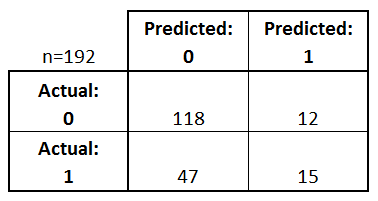

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [12]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

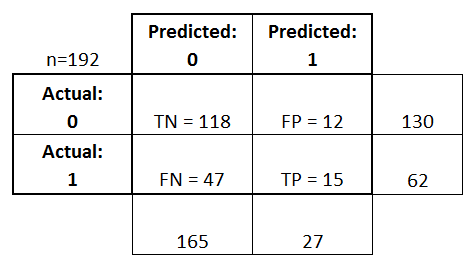

## Metrics computed from a confusion matrix

# 1. Classification Accuracy
- Overall, how often is the classifier correct?

In [13]:
print( (TP + TN) / float(TP+TN+FP+FN) )
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


# 2. Classification Error
- Overall, how often is the classifier incorrect?
- AKA "Misclassification Rate"

In [14]:
print( (FP + FN) / float(TP+TN+FP+FN) )
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


## Sensitivity( a.k.a True Positive Rate/Recall)
- When the acutal value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting postitive instances?
- 레알 /2종오류 + 레알

In [15]:
print(TP/ float(TP+FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


##  Specificity
- When the actual value is negative, how often is the prediction correct?
- How "sepcific"(or "selective") is the classifier in predicting negative instances

In [16]:
print(TN/float(TN + FP))

0.907692307692


## False Positive Rate
- When the actual value is negative, how often is the prediction incorrect?
- 1종오류 빈도 / actual 0

In [17]:
print(FP/float(TN + FP))

0.0923076923077


## Precision 
- When a positive value is predicted, how often is the prediction correct?
- how "precise" is the classifier when predicting positive instances?

In [18]:
print(TP/float(TP+FP))

0.555555555556


# Adjusting the classification threshold

In [19]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [20]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [21]:
#print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In this case, classification threshold is proba **0.5** /if below = 0, if above = 1

In [22]:
#store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

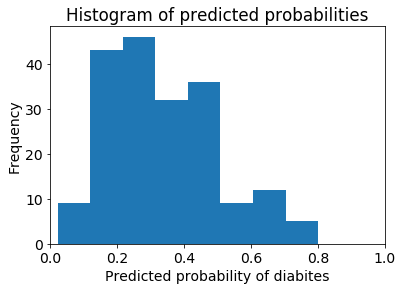

In [24]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabites')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [25]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_prob = y_pred_prob.reshape(-1,1)
y_pred_class = binarize(y_pred_prob, 0.3)

In [26]:
y_pred_prob = [item for sublist in y_pred_prob for item in sublist]
y_pred_prob[0:10]

[0.36752429081940358,
 0.283563438053968,
 0.28895885890913553,
 0.41410619961397949,
 0.15896026580896985,
 0.1706515633991722,
 0.49889025741697934,
 0.5134154083762249,
 0.27678612465224067,
 0.67189437681965225]

In [27]:
y_pred_class = [item for sublist in y_pred_class for item in sublist]
y_pred_class[0:10]

[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]

In [28]:
print(confusion)

[[118  12]
 [ 47  15]]


In [29]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [30]:
#sensitivity(used to be .24)
print(46/float(46+16))

0.7419354838709677


In [31]:
#specificity (used to be .91)
print(80/float(80+50))

0.6153846153846154


## Conclusion
- **Threshold of 0.5** is used by default(for binary problems) to convert predicted probabilites into class predictions
- Threshold can be **adjusted** to increase sensitivity or specifivity
- Sensitivity and speicificity have an **inverse relationship**

## ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

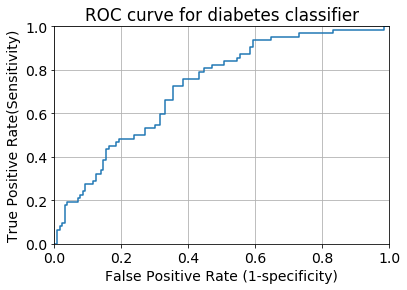

In [32]:
# ***** IMPORTANT: first argument is ture values, second arguement is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the threshold** used to generate the curve on the ROC curve itself

In [33]:
def evaluate_threshold(threshold):
    global sense
    sense = tpr[thresholds > threshold][-1]
    global spec
    spec = 1 - fpr[thresholds > threshold][-1]
    return sense, spec

In [34]:
evaluate_threshold(0.5)

(0.24193548387096775, 0.90769230769230769)

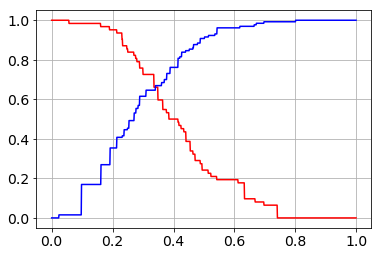

In [36]:
import numpy as np
t = np.arange(0, 1, 0.001)
q = []
e = []
for i in t:
    evaluate_threshold(i)
    a = evaluate_threshold(i)[0]
    b = evaluate_threshold(i)[1]
    q.append(a)
    e.append(b)
plt.plot(t, q, 'r-', t, e, 'b-')
plt.grid(True)
